In [10]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import csv
import glob

def Read_Data(WeekNumber, Year):
#	pass
      columns=["Mode", "Date", "DateTime", "CardID", "CardType", "VehicleID",
                   "ParentRoute", "RouteID", "StopID"] 
      fname = glob.glob(Year + '/Week%s' %WeekNumber + "/*.txt")
      print(fname)
      dataset = pd.read_csv(fname[0], sep="|", names=columns)
   
      # Creating separate columns for Year, Month, Day
      dataset['Date']  = pd.to_datetime(dataset['Date'])
      dataset['Year']  = dataset['Date'].dt.year
      dataset['Month'] = dataset['Date'].dt.month
      dataset['Day']   = dataset['Date'].dt.day

      #Reading in stoplocation data:
      columns2 = ["StopID", "StopName", "Bla", "Bla", "Bla", "PostCode", "City","Bla", "MetroName", "lat", "long"]
      dataset2 = pd.read_csv('stop_locations.txt', sep="|", names = columns2)
      # creating a file with all data and their matched latitued and longitude cooridnates.
      newdata =  dataset2[['StopID', 'StopName','PostCode', 'lat', 'long']]  
      
      All = pd.merge(dataset, newdata, how='right', on='StopID')   
      return All


def Append_data(Year, FirstWeek, LastWeek):
    basic_table = Read_Data(FirstWeek, Year)
    for i in range(FirstWeek+1, LastWeek+1):
          Actual_Table    = Read_Data(i, Year)
          basic_table     = basic_table.append(Actual_Table) 
          print('appended', len(basic_table))
    return basic_table

dataset_2015 = Append_data("2015", 27, 53) #27, 53
#dataset_2016 = Append_data("2016", 1, 53)  #1, 53
#dataset_2017 = Append_data("2017", 1, 53)  #1, 53
dataset_2018 = Append_data("2018", 1, 26)  #1, 26

dataset_2015_train = dataset_2015[dataset_2015.Mode == 2]
#dataset_2016_train = dataset_2016[dataset_2016.Mode == 2]
#dataset_2017_train = dataset_2017[dataset_2017.Mode == 2]
dataset_2018_train = dataset_2018[dataset_2018.Mode == 2]

dataset_2015_tram = dataset_2015[dataset_2015.Mode == 3]
#dataset_2016_tram = dataset_2016[dataset_2016.Mode == 3]
#dataset_2017_tram = dataset_2017[dataset_2017.Mode == 3]
dataset_2018_tram = dataset_2018[dataset_2018.Mode == 3]

dataset_2015_bus = dataset_2015[dataset_2015.Mode == 1]
#dataset_2016_bus = dataset_2016[dataset_2016.Mode == 1]
#dataset_2017_bus = dataset_2017[dataset_2017.Mode == 1]
dataset_2018_bus = dataset_2018[dataset_2018.Mode == 1]


['2015/Week27/file27.txt']


/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


['2015/Week28/file28.txt']
appended 562949
['2015/Week29/file29.txt']
appended 938763
['2015/Week30/file30.txt']
appended 1345681
['2015/Week31/file31.txt']
appended 1756802
['2015/Week32/file32.txt']
appended 2167346
['2015/Week33/file33.txt']
appended 2582381
['2015/Week34/file34.txt']
appended 3000498
['2015/Week35/file35.txt']
appended 3415944
['2015/Week36/file36.txt']
appended 3812335
['2015/Week37/file37.txt']
appended 4227738
['2015/Week38/file38.txt']
appended 4644584
['2015/Week39/file39.txt']
appended 5036225
['2015/Week40/file40.txt']
appended 5386724
['2015/Week41/file41.txt']
appended 5800822
['2015/Week42/file42.txt']
appended 6221885
['2015/Week43/file43.txt']
appended 6638975
['2015/Week44/file44.txt']
appended 7045497
['2015/Week45/file45.txt']
appended 7397961
['2015/Week46/file46.txt']
appended 7804812
['2015/Week47/file47.txt']
appended 8213773
['2015/Week48/file48.txt']
appended 8616071
['2015/Week49/file49.txt']
appended 9017024
['2015/Week50/file50.txt']
appende

In [23]:
def group(mydata):   
    # group by Month and count how many unique customers are there (not touch-ons!!!)
    date_and_time = mydata.groupby(["Month"]).CardID.nunique().reset_index()
    #How many days are there in the month
    Nr_of_days = mydata.groupby(["Month"]).Date.nunique().reset_index()
    print(Nr_of_days)
    # normalise customer numbers by days in a month
    date_and_time['Nr_customers_normalised_by_days'] = date_and_time.CardID / Nr_of_days.Date
    date_and_time.sort_values("Month")
    return date_and_time


In [24]:
################################
Months_2015      = ["July", "August", "September",  "October", "November", "December"] 
Months_2016_2017 = ["January", "February", "March", "April", "May", "June", "July", "August", "September",  "October", "November", "December"] 
Months_2018      = ["January", "February", "March", "April", "May", "June"] 

def plotting(my_grouped_data, myMonths):
    dataset_grouped = group(my_grouped_data)
    dataset_grouped["MonthNames"] = myMonths
    dataset_grouped.sort_values("Month")
    return dataset_grouped
    
def ReturnMean(mydata_mean):    
    mean = mydata_mean.Nr_customers_normalised_by_days.mean()
    return mean


/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3766: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


   Month  Date
0    7.0    31
1    8.0    31
2    9.0    30
3   10.0    31
4   11.0    30
5   12.0    31
   Month  Date
0    1.0    31
1    2.0    28
2    3.0    31
3    4.0    30
4    5.0    31
5    6.0    30


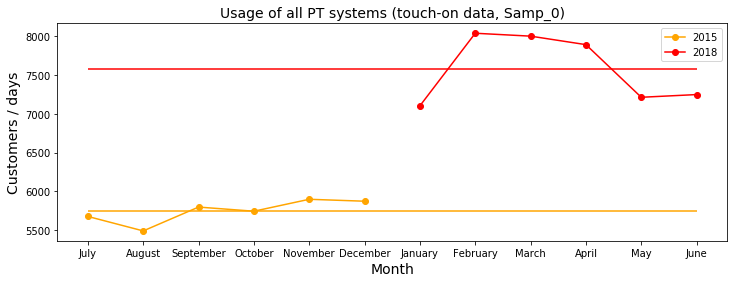

In [32]:
#plotting all modes of transport together
plt.figure(figsize=(12,4))
ax = plt.subplot()

#plt.xlim(0,12.5)

dataset_forPlot_2015 = plotting(dataset_2015, Months_2015)
#dataset_forPlot_2016 = plotting(dataset_2016, Months_2016_2017)
#dataset_forPlot_2017 = plotting(dataset_2017, Months_2016_2017)
dataset_forPlot_2018 = plotting(dataset_2018, Months_2018)


#plt.plot(dataset_forPlot_2016.MonthNames,dataset_forPlot_2016.Nr_customers_normalised_by_days, color = 'blue', label ='2016', marker ='o')
plt.plot(dataset_forPlot_2015.MonthNames,dataset_forPlot_2015.Nr_customers_normalised_by_days,  color = 'orange', label ='2015', marker ='o')
#plt.plot(dataset_forPlot_2017.MonthNames,dataset_forPlot_2017.Nr_customers_normalised_by_days,  color = 'green', label ='2017', marker ='o')
plt.plot(dataset_forPlot_2018.MonthNames,dataset_forPlot_2018.Nr_customers_normalised_by_days, color = 'red', label ='2018', marker ='o')


plt.hlines(ReturnMean(dataset_forPlot_2015), xmin=0, xmax =11, color = 'orange')
#plt.hlines(ReturnMean(dataset_forPlot_2016), xmin=0, xmax =11, color = 'blue')
#plt.hlines(ReturnMean(dataset_forPlot_2017), xmin=0, xmax =11, color = 'green')
plt.hlines(ReturnMean(dataset_forPlot_2018), xmin=0, xmax =11, color='red')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Customers / days',fontsize=14)
plt.title('Usage of all PT systems (touch-on data, Samp_0)',fontsize=14)
plt.legend()
plt.savefig('All_users_overThe_Years.png')
plt.show()


   Month  Date
0    7.0    31
1    8.0    31
2    9.0    30
3   10.0    31
4   11.0    30
5   12.0    31
   Month  Date
0    1.0    31
1    2.0    28
2    3.0    31
3    4.0    30
4    5.0    31
5    6.0    30


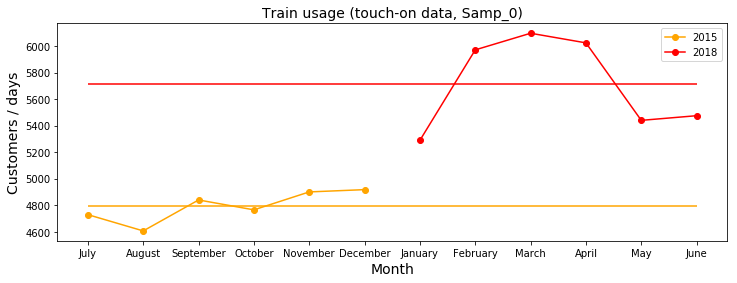

In [33]:
#plotting train systems
plt.figure(figsize=(12,4))
ax = plt.subplot()

dataset_forPlot_2015_train  = plotting(dataset_2015_train, Months_2015)
#dataset_forPlot_2016_train = plotting(dataset_2016_train, Months_2016_2017)
#dataset_forPlot_2017_train = plotting(dataset_2017_train, Months_2016_2017)
dataset_forPlot_2018_train  = plotting(dataset_2018_train, Months_2018)


#plt.plot(dataset_forPlot_2016_train.MonthNames,dataset_forPlot_2016_train.Nr_customers_normalised_by_days, color = 'blue', label ='2016', marker ='o')
plt.plot(dataset_forPlot_2015_train.MonthNames,dataset_forPlot_2015_train.Nr_customers_normalised_by_days,  color = 'orange', label ='2015', marker ='o')
#plt.plot(dataset_forPlot_2017_train.MonthNames,dataset_forPlot_2017_train.Nr_customers_normalised_by_days,  color = 'green', label ='2017', marker ='o')
plt.plot(dataset_forPlot_2018_train.MonthNames,dataset_forPlot_2018_train.Nr_customers_normalised_by_days, color = 'red', label ='2018', marker ='o')


plt.hlines(ReturnMean(dataset_forPlot_2015_train), xmin=0, xmax =11, color = 'orange')
#plt.hlines(ReturnMean(dataset_forPlot_2016_train), xmin=0, xmax =11, color = 'blue')
#plt.hlines(ReturnMean(dataset_forPlot_2017_train), xmin=0, xmax =11, color = 'green')
plt.hlines(ReturnMean(dataset_forPlot_2018_train), xmin=0, xmax =11, color='red')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Customers / days',fontsize=14)
plt.title('Train usage (touch-on data, Samp_0)',fontsize=14)
plt.legend()
plt.savefig('Trains_users_overThe_Years.png')
plt.show()


   Month  Date
0    7.0    31
1    8.0    31
2    9.0    30
3   10.0    31
4   11.0    30
5   12.0    31
   Month  Date
0    1.0    31
1    2.0    28
2    3.0    31
3    4.0    30
4    5.0    31
5    6.0    30


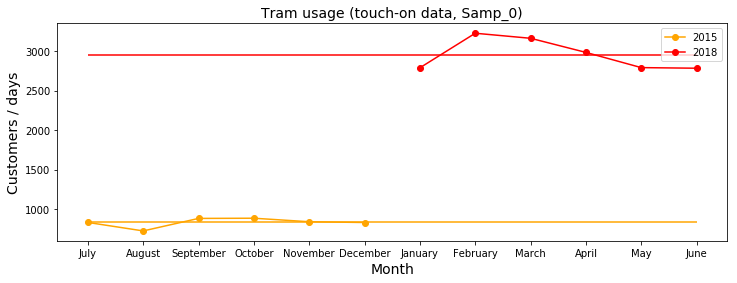

In [34]:
#plotting tram systems
plt.figure(figsize=(12,4))
ax = plt.subplot()

dataset_forPlot_2015_tram  = plotting(dataset_2015_tram, Months_2015)
#dataset_forPlot_2016_tram = plotting(dataset_2016_tram, Months_2016_2017)
#dataset_forPlot_2017_tram = plotting(dataset_2017_tram, Months_2016_2017)
dataset_forPlot_2018_tram  = plotting(dataset_2018_tram, Months_2018)


#plt.plot(dataset_forPlot_2016_tram.MonthNames,dataset_forPlot_2016_tram.Nr_customers_normalised_by_days, color = 'blue', label ='2016', marker ='o')
plt.plot(dataset_forPlot_2015_tram.MonthNames,dataset_forPlot_2015_tram.Nr_customers_normalised_by_days,  color = 'orange', label ='2015', marker ='o')
#plt.plot(dataset_forPlot_2017_tram.MonthNames,dataset_forPlot_2017_tram.Nr_customers_normalised_by_days,  color = 'green', label ='2017', marker ='o')
plt.plot(dataset_forPlot_2018_tram.MonthNames,dataset_forPlot_2018_tram.Nr_customers_normalised_by_days, color = 'red', label ='2018', marker ='o')


plt.hlines(ReturnMean(dataset_forPlot_2015_tram), xmin=0, xmax =11, color = 'orange')
#plt.hlines(ReturnMean(dataset_forPlot_2016_tram), xmin=0, xmax =11, color = 'blue')
#plt.hlines(ReturnMean(dataset_forPlot_2017_tram), xmin=0, xmax =11, color = 'green')
plt.hlines(ReturnMean(dataset_forPlot_2018_tram), xmin=0, xmax =11, color='red')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Customers / days',fontsize=14)
plt.title('Tram usage (touch-on data, Samp_0)',fontsize=14)
plt.legend()
plt.savefig('Trams_users_overThe_Years.png')
plt.show()


   Month  Date
0    7.0    31
1    8.0    31
2    9.0    30
3   10.0    31
4   11.0    30
5   12.0    31
   Month  Date
0    1.0    31
1    2.0    28
2    3.0    31
3    4.0    30
4    5.0    31
5    6.0    30


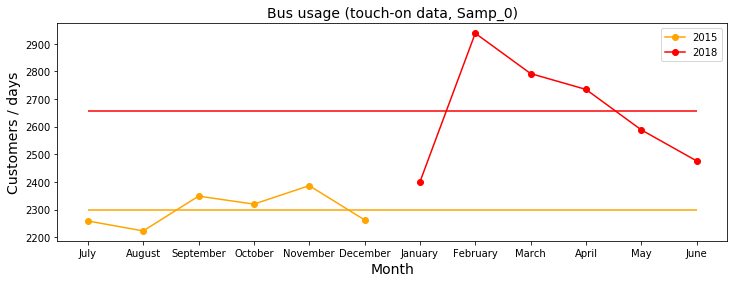

In [35]:
#plotting bus systems
plt.figure(figsize=(12,4))
ax = plt.subplot()

dataset_forPlot_2015_bus  = plotting(dataset_2015_bus, Months_2015)
#dataset_forPlot_2016_bus = plotting(dataset_2016_bus, Months_2016_2017)
#dataset_forPlot_2017_bus = plotting(dataset_2017_bus, Months_2016_2017)
dataset_forPlot_2018_bus  = plotting(dataset_2018_bus, Months_2018)


#plt.plot(dataset_forPlot_2016_bus.MonthNames,dataset_forPlot_2016_bus.Nr_customers_normalised_by_days, color = 'blue', label ='2016', marker ='o')
plt.plot(dataset_forPlot_2015_bus.MonthNames,dataset_forPlot_2015_bus.Nr_customers_normalised_by_days,  color = 'orange', label ='2015', marker ='o')
#plt.plot(dataset_forPlot_2017_bus.MonthNames,dataset_forPlot_2017_bus.Nr_customers_normalised_by_days,  color = 'green', label ='2017', marker ='o')
plt.plot(dataset_forPlot_2018_bus.MonthNames,dataset_forPlot_2018_bus.Nr_customers_normalised_by_days, color = 'red', label ='2018', marker ='o')


plt.hlines(ReturnMean(dataset_forPlot_2015_bus), xmin=0, xmax =11, color = 'orange')
#plt.hlines(ReturnMean(dataset_forPlot_2016_bus), xmin=0, xmax =11, color = 'blue')
#plt.hlines(ReturnMean(dataset_forPlot_2017_bus), xmin=0, xmax =11, color = 'green')
plt.hlines(ReturnMean(dataset_forPlot_2018_bus), xmin=0, xmax =11, color='red')


plt.xlabel('Month', fontsize=14)
plt.ylabel('Customers / days',fontsize=14)
plt.title('Bus usage (touch-on data, Samp_0)',fontsize=14)
plt.legend()
plt.savefig('Bus_users_overThe_Years.png')
plt.show()